In [1]:
%matplotlib inline

import cv2
import numpy as np
import ImageUtils

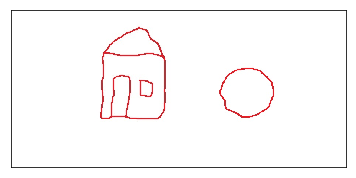

In [2]:
house = cv2.imread('D:/farzad/Artificial Intelligence/CV/fromTutor-20180901T044023Z-001/fromTutor/images/house.jpg')
ImageUtils.show_img_plt(house)

backup_house = house.copy()
gray_house = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
ImageUtils.plot_grayscale_imshow(gray_house,5)

In [3]:
ret_val, binarized_house = cv2.threshold(gray_house, 127,255,cv2.THRESH_BINARY_INV)
ImageUtils.plot_grayscale_imshow(binarized_house,5)

In [4]:
#Find contours
mod_image, contours, hierarchy = cv2.findContours(binarized_house.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(str(len(contours)))

2


In [5]:
#Iterate through contours and build bounded box

for i in contours:
    accuracy = 0.04*cv2.arcLength(i,True)
    #approx_contour = cv2.approxPolyDP(i,accuracy,True)
    approx_contour = cv2.convexHull(i,accuracy,True)
    #print(approx_contour)
    cv2.drawContours(house,[approx_contour],0,(0,255,0),2)
    cv2.imshow('Approx Poly',house)
    cv2.waitKey(5000)
    cv2.destroyAllWindows()
    
    



In [13]:
#shape matching
template = cv2.imread('D:/farzad/Artificial Intelligence/CV/fromTutor-20180901T044023Z-001/fromTutor/images/template_image_shape.jpg')

shapes = cv2.imread('D:/farzad/Artificial Intelligence/CV/fromTutor-20180901T044023Z-001/fromTutor/images/inp_shapes.jpg')
gray_shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

ImageUtils.plot_grayscale_imshow(gray_shapes,5)
ImageUtils.plot_grayscale_imshow(gray_template,5)

In [15]:

ret , t_template = cv2.threshold(gray_template,127,255,0)
ret , t_gray = cv2.threshold(gray_shapes,127,255,0)

ImageUtils.plot_grayscale_imshow(t_template,5)
ImageUtils.plot_grayscale_imshow(t_gray,5)


In [28]:
mod_image, contours, h = cv2.findContours(t_template.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(str(len(contours)))

2


In [29]:
mod_image_inp, contours_inp, h_inp = cv2.findContours(t_gray.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(str(len(contours_inp)))


6


In [30]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
template_contour_correct = sorted_contours[1]

blank_image_template = np.zeros((t_template.shape[0],t_template.shape[1], 3))
cv2.drawContours(blank_image_template, template_contour_correct, -1, (0,0,255), 2)
cv2.imshow('Approx Poly', blank_image_template)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [32]:
mod_image_inp, contours_inp, hierarchy_inp  = cv2.findContours(t_gray.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(str(len(contours_inp)))

blank_image = np.zeros((t_gray.shape[0],t_gray.shape[1], 3))

for contour in contours_inp:
    cv2.drawContours(blank_image, contour, -1, (255,0,0), 2)
    cv2.imshow('Approx Poly', blank_image)
    cv2.waitKey(5000)
    cv2.destroyAllWindows()
    

6


In [34]:
sorted_contours_inp = sorted(contours_inp, key=cv2.contourArea, reverse=True)
contours_inp_correct =  sorted_contours_inp[1:]
print(str(len(contours_inp_correct)))

for inp_contour in contours_inp_correct:
    
    #cv2.matchShapes function matches the shapes
    #Compares two inp shapes/contours and returs a matching number based on similarity
    #Lower the number, better match it is
    
    match1 = cv2.matchShapes(template_contour_correct, inp_contour, 3, 0.0)
    print (match1)
    
    if match1 < 0.15:
        closest_contour = inp_contour
    else:
        closest_contour = []
        
        
#Diplay the closest contour
blank_image = np.zeros((t_gray.shape[0],t_gray.shape[1], 3))
cv2.drawContours(blank_image, closest_contour, -1, (255,0,0), 2)
cv2.imshow('Approx Poly', blank_image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

5
0.11767823374476596
0.019027562407530264
0.19328403343120895
0.20326892530614005
0.0008724628986861834
